# Dissertation with no preprocessed method

This file only provide data that had not preprocessed method. Everything is the same except that there are no method for preprocessing. # sign removal are to be remove to be in control of the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from nltk.tokenize.treebank import TreebankWordDetokenizer

from tqdm import tqdm, tqdm_notebook, tnrange
tqdm.pandas(desc='Progress')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sys
import os
import re
import string
import unicodedata
import itertools

In [2]:
from bs4 import BeautifulSoup
import unidecode
from word2number import w2n

In [3]:
print('Python version:',sys.version)
print('Pandas version:',pd.__version__)

Python version: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
Pandas version: 1.2.4


In [4]:
df = pd.read_csv("C:/Users/Chan Ken Lok/Documents/Dissertations/depression-detection/data/tweets_combined.csv")
pd.set_option('display.max_colwidth', 1)

In [5]:
df.target.value_counts()

0    2357
1    843 
Name: target, dtype: int64

In [6]:
df['tweet'].head(5)

0    Today in Selfcare: beauty &amp; laughs Kung Fu Panda 3 #Wellness #joy #laughter #selfcare #therapist #philadelphia
1    I get to spend New Year's home again alone and lonely. ???•                                                       
2    Depressed and lonely /: Stuck in a deep, never ending hole :(                                                     
3    If this is your response to someone saying they're dealing with , you're a terrible person.                       
4    Apparently you get a free pass just by mentioning    Where was I on the free badge day??!!                        
Name: tweet, dtype: object

In [7]:
def tweet_clean(text):
    text = re.sub(r'#\w+', ' ', text) # remove hashtag symbol c
    return text.strip()

In [8]:
%%time
df['tweet'] = df['tweet'].apply(lambda x : tweet_clean(x))

Wall time: 6.01 ms


### split the test

In [9]:
def split_train_test(df, test_size=0.2):
    train, val = train_test_split(df, test_size=test_size,random_state=42)
    return train.reset_index(drop=True), val.reset_index(drop=True)

In [10]:
# create train and validation set 
train_val, test = split_train_test(df, test_size=0.2)
train, val = split_train_test(train_val, test_size=0.2)

In [11]:
train.to_csv("train.csv", index=False)
val.to_csv("val.csv", index=False)
test.to_csv("test.csv", index=False)

In [12]:
train.shape, val.shape, test.shape

((2048, 3), (512, 3), (640, 3))

In [13]:
from nltk import pos_tag
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [14]:
Encoder = LabelEncoder()

In [15]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(train['tweet'])

TfidfVectorizer(max_features=5000)

In [16]:
Train_Y = Encoder.fit_transform(train['target'])
Test_Y = Encoder.fit_transform(val['target'])
Train_X_Tfidf = Tfidf_vect.transform(train['tweet'])
Test_X_Tfidf = Tfidf_vect.transform(val['tweet'])

In [17]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("Naive Bayes f1 measure Score -> ",f1_score(predictions_NB, Test_Y)*100)
print("Naive Bayes precision Score -> ",precision_score(predictions_NB, Test_Y)*100)
print("Naive Bayes recall Score -> ",recall_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  75.1953125
Naive Bayes f1 measure Score ->  4.511278195488722
Naive Bayes precision Score ->  2.307692307692308
Naive Bayes recall Score ->  100.0


In [18]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM f1 measure Score -> ",f1_score(predictions_SVM, Test_Y)*100)
print("SVM precision Score -> ",precision_score(predictions_SVM, Test_Y)*100)
print("SVM recall Score -> ",recall_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  77.5390625
SVM f1 measure Score ->  47.963800904977376
SVM precision Score ->  40.76923076923077
SVM recall Score ->  58.24175824175825


[Text(0, 0.5, 'scores'), Text(0.5, 0, 'Models'), Text(0.5, 1.0, 'F measures')]

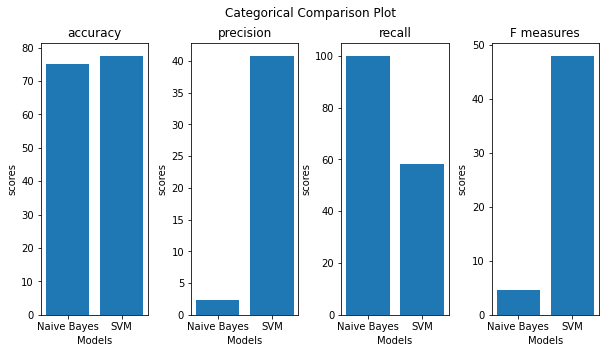

In [19]:
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

class_label = ['Naive Bayes', 'SVM']

plt.suptitle('Categorical Comparison Plot')
ax = fig.add_subplot(1,4,1)
plt.bar(class_label, [accuracy_score(predictions_NB, Test_Y)*100,accuracy_score(predictions_SVM, Test_Y)*100])
ax.set(xlabel='Models', ylabel="scores", title="accuracy")

ay = fig.add_subplot(1,4,2)
plt.bar(class_label, [precision_score(predictions_NB, Test_Y)*100,precision_score(predictions_SVM, Test_Y)*100])
ay.set(xlabel='Models', ylabel="scores", title="precision")

az = fig.add_subplot(1,4,3)
plt.bar(class_label, [recall_score(predictions_NB, Test_Y)*100,recall_score(predictions_SVM, Test_Y)*100])
az.set(xlabel='Models', ylabel="scores", title="recall")

bx = fig.add_subplot(1,4,4)
plt.bar(class_label, [f1_score(predictions_NB, Test_Y)*100,f1_score(predictions_SVM, Test_Y)*100])
bx.set(xlabel='Models', ylabel="scores", title="F measures")

In [20]:
Test_X_Tfidf_f = Tfidf_vect.transform(test['tweet'])
Test_Y_f = Encoder.fit_transform(test['target'])

In [21]:
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf_f)

SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf_f)

The accuracy score is only shown here as there is error in the naive bayes recall,precision and F measues

C:\Users\Chan Ken Lok\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0, 0.5, 'scores'), Text(0.5, 0, 'Models'), Text(0.5, 1.0, 'F measures')]

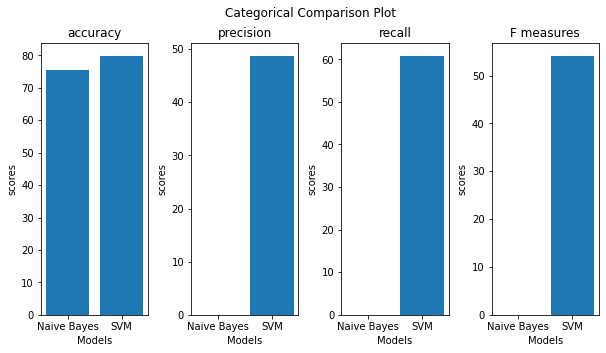

In [22]:
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

class_label = ['Naive Bayes', 'SVM']

plt.suptitle('Categorical Comparison Plot')
ax = fig.add_subplot(1,4,1)
plt.bar(class_label, [accuracy_score(predictions_NB, Test_Y_f)*100,accuracy_score(predictions_SVM, Test_Y_f)*100])
ax.set(xlabel='Models', ylabel="scores", title="accuracy")

ay = fig.add_subplot(1,4,2)
plt.bar(class_label, [precision_score(predictions_NB, Test_Y_f)*100,precision_score(predictions_SVM, Test_Y_f)*100])
ay.set(xlabel='Models', ylabel="scores", title="precision")

az = fig.add_subplot(1,4,3)
plt.bar(class_label, [recall_score(predictions_NB, Test_Y_f)*100,recall_score(predictions_SVM, Test_Y_f)*100])
az.set(xlabel='Models', ylabel="scores", title="recall")

bx = fig.add_subplot(1,4,4)
plt.bar(class_label, [f1_score(predictions_NB, Test_Y_f)*100,f1_score(predictions_SVM, Test_Y_f)*100])
bx.set(xlabel='Models', ylabel="scores", title="F measures")

In [23]:
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y_f)*100)
print("Naive Bayes f1 measure Score -> ",f1_score(predictions_NB, Test_Y_f)*100)
print("Naive Bayes precision Score -> ",precision_score(predictions_NB, Test_Y_f)*100)
print("Naive Bayes recall Score -> ",recall_score(predictions_NB, Test_Y_f)*100)

Naive Bayes Accuracy Score ->  75.625
Naive Bayes f1 measure Score ->  0.0
Naive Bayes precision Score ->  0.0
Naive Bayes recall Score ->  0.0


C:\Users\Chan Ken Lok\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_f)*100)
print("SVM f1 measure Score -> ",f1_score(predictions_SVM, Test_Y_f)*100)
print("SVM precision Score -> ",precision_score(predictions_SVM, Test_Y_f)*100)
print("SVM recall Score -> ",recall_score(predictions_SVM, Test_Y_f)*100)

SVM Accuracy Score ->  79.84375
SVM f1 measure Score ->  54.092526690391466
SVM precision Score ->  48.717948717948715
SVM recall Score ->  60.8
